In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path="D:/W1Pandas"

In [3]:
os.chdir(path)

In [4]:
from grader import Grader

In [5]:
transactions    = pd.read_csv('sales_train.csv.gz')
items           = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops           = pd.read_csv('shops.csv')

In [6]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
transactions.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [9]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [10]:
item_categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [11]:
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [12]:
transactions['date'].head(5)

0    02.01.2013
1    03.01.2013
2    05.01.2013
3    06.01.2013
4    15.01.2013
Name: date, dtype: object

In [13]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')

In [14]:
transactions['date'].head(5)

0   2013-01-02
1   2013-01-03
2   2013-01-05
3   2013-01-06
4   2013-01-15
Name: date, dtype: datetime64[ns]

In [15]:
print(transactions['date'][0].month)



1


In [17]:
from datetime import date

In [18]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')
mtr=transactions[(transactions['date'] >= date(2014, 9, 1))&(transactions['date'] <= date(2014, 9, 30))]

In [19]:
del mtr

In [20]:
Sept_14=transactions[(transactions['date'] >= date(2014, 9, 1))&(transactions['date'] <= date(2014, 9, 30))]

In [22]:
Sept_14['revenue'] = Sept_14.item_price * Sept_14.item_cnt_day

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
Ids = Sept_14.groupby(['shop_id'])['revenue'].sum().max()

In [25]:
print(Ids)

7982852.2


In [26]:
Max = Sept_14.groupby(['shop_id'])['revenue'].sum().max()

In [28]:
mergedata = transactions.merge(items, how='inner', on='item_id')

In [29]:
summer=mergedata[(mergedata['date'] >= date(2014, 6, 1))&(mergedata['date'] <= date(2014, 8, 31))]

In [30]:
summer['revenue']=summer.item_price*summer.item_cnt_day

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
summer_max = summer.groupby(['item_category_id'])['revenue'].max()

In [32]:
print(summer_max)

item_category_id
2      12180.00
3      12760.00
4        598.00
5       3180.00
6       9180.00
8       7200.00
9      17250.00
11     31960.00
12     91960.00
13      2598.00
14     19980.00
15     74950.00
16      4950.00
17      4490.00
19     20792.00
20    226497.00
21      1998.00
22      3897.00
23     22490.50
25      1998.00
28     26071.00
29     27693.00
30     59900.00
31     12579.00
32      6000.00
33     25990.00
34      8000.00
35     10396.00
37      3331.67
38      5696.00
        ...    
46       299.00
49      6980.00
51       129.00
54      3500.00
55      2149.00
56      2498.00
57       899.00
58      9499.00
59      1248.00
60      8649.00
61     18894.00
62     13999.00
63      5995.00
64      4199.00
65      9160.00
66        84.00
67     12899.00
69      8997.00
70      1495.00
71      2505.00
72     26486.00
73     30600.00
75     33810.00
76     16790.00
77       799.00
78      1720.00
79     16790.00
81       599.00
82       350.00
83       654.00
Name: r

In [33]:
summer_max.max()

226497.0

In [34]:
std_const = transactions.groupby(['item_id'])['item_price'].std(ddof=0)

In [35]:
print(std_const)

item_id
0          0.000000
1          0.000000
2          0.000000
3         21.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13         0.000000
14         0.000000
15         0.000000
16         0.000000
17         0.000000
18         0.000000
19         0.000000
20         0.000000
21         0.000000
22         0.000000
23         0.000000
24         0.000000
25         0.000000
26         0.000000
27       602.537838
28       117.486737
29       590.319941
            ...    
22140     95.720970
22141     39.406485
22142      0.000000
22143     27.670734
22144    103.151374
22145     78.334000
22146     62.592506
22147     24.575391
22148      0.000000
22149     35.236461
22150     14.675414
22151     45.651472
22152     13.547112
22153     60.859364
22154    333.602416
22155     98.391292
22156      0.000000
22157     38.213218
22158      0

In [36]:
const_dum = (std_const == 0)

In [37]:
print(const_dum)

item_id
0         True
1         True
2         True
3        False
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27       False
28       False
29       False
         ...  
22140    False
22141    False
22142     True
22143    False
22144    False
22145    False
22146    False
22147    False
22148     True
22149    False
22150    False
22151    False
22152    False
22153    False
22154    False
22155    False
22156     True
22157    False
22158     True
22159     True
22160    False
22161     True
22162    False
22163    False
22164    False
22165     True
22166     True
22167    False
22168    False
22169     True
Name: item_price, Length: 21807, dtype: bool


In [38]:
cont_int = const_dum.astype(int)

In [39]:
print(cont_int)

item_id
0        1
1        1
2        1
3        0
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       0
28       0
29       0
        ..
22140    0
22141    0
22142    1
22143    0
22144    0
22145    0
22146    0
22147    0
22148    1
22149    0
22150    0
22151    0
22152    0
22153    0
22154    0
22155    0
22156    1
22157    0
22158    1
22159    1
22160    0
22161    1
22162    0
22163    0
22164    0
22165    1
22166    1
22167    0
22168    0
22169    1
Name: item_price, Length: 21807, dtype: int32


In [40]:
total = cont_int.sum()

In [41]:
print(total)

5926


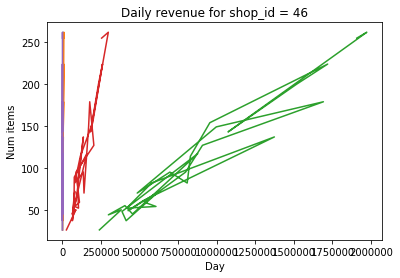

In [43]:
shop_id = 46

from datetime import date
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')
df=transactions[(transactions.shop_id==46)&(transactions['date'] >= date(2014, 12, 1))&(transactions['date'] <= date(2014, 12, 31))]
df2 = df.groupby(['date']).agg('sum')
df3 = df.groupby(['date'])['item_cnt_day'].agg('sum')
df3var = df3.var(axis=0,ddof=1)

total_num_items_sold = df3 # YOUR CODE GOES HERE
days = df2 # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 46")
plt.show()